In [117]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from statistics import mean
from scipy.optimize import curve_fit
import scipy

from NUC_functions import create_NUC_df, collapse_df,compile_NUC_matrix_input,calc_NUC_coef

In [120]:
#choose filepath to desired data
path = '/Users/kirahart/Dropbox/GitHub/IRCSP2_data/enviro_chamber/'
cal_file = 'cam2_left.h5'

In [140]:
#will create a df and print the names of the keys in the original hdf5 file
df1 = create_NUC_df(path,cal_file)
df2 = create_NUC_df(path,"ST25_ETneg35_NumSamp1000.h5")
df3 = create_NUC_df(path,"TempSetneg35_NumSamp500.h5")

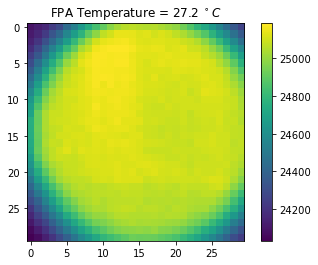

In [178]:
i =800;
plt.imshow(df1['images1'][i][125:155,190:220])
plt.colorbar()
plt.title('FPA Temperature = ' + str(np.round(df1['temp1'][i],2)) + ' $^\circ C$')
plt.show()


In [143]:
for i in range(len(df1["temp1"])):
    if df1["temp1"][i] > 100:
        t1 = df1["temp1"][i]
        t2 =t1-6553.5
        df1["temp1"][i] = t2
        
for i in range(len(df2["temp1"])):
    if df2["temp1"][i] > 100:
        t1 = df2["temp1"][i]
        t2 =t1-6553.5
        df2["temp1"][i] = t2
        
for i in range(len(df3["temp1"])):
    if df3["temp1"][i] > 100:
        t1 = df3["temp1"][i]
        t2 =t1-6553.5
        df3["temp1"][i] = t2        

<ipython-input-143-919ebd93cbcb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["temp1"][i] = t2
<ipython-input-143-919ebd93cbcb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["temp1"][i] = t2
<ipython-input-143-919ebd93cbcb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["temp1"][i] = t2


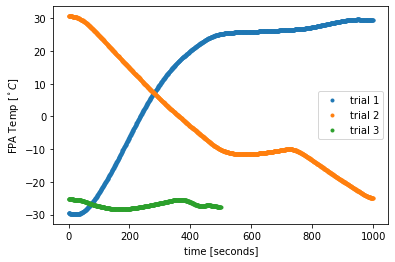

In [148]:
plt.plot(df1["temp1"],'.',label = "trial 1")
plt.plot(df2["temp1"],'.',label = "trial 2")
plt.plot(df3["temp1"],'.',label = "trial 3")
plt.ylabel('FPA Temp [$^\circ C$]')
plt.xlabel('time [seconds]')
plt.legend()
plt.show()

In [153]:
#calculate average respones
center = []
right =[]
left =[]
ref =[]
for i in range(len(df1["images1"])):
    c = np.mean(df1['images1'][i][125:145,143:163])
    center.append(c)
    
    r = np.mean(df1['images1'][i][130:150,195:215])
    right.append(r)
    
    l = np.mean(df1['images1'][i][135:155,90:115])
    left.append(l)
    
    re = np.mean(df1['images1'][i][0:10,0:10])
    ref.append(re)

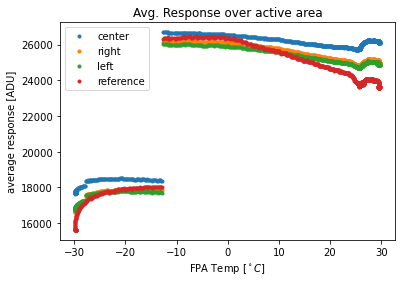

In [154]:
plt.plot(df1["temp1"], center,'.',label = 'center')
plt.plot(df1["temp1"], right,'.',label = 'right')
plt.plot(df1["temp1"], left,'.',label = 'left')
plt.plot(df1["temp1"], ref,'.',label = 'reference')
plt.ylabel('average response [ADU]')
plt.xlabel('FPA Temp [$^\circ C$]')
plt.title("Avg. Response over active area")
plt.legend()
plt.show()

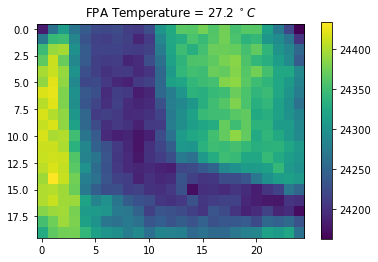

In [207]:
i =800;
plt.imshow(df2['images1'][i][120:140,295:320])
plt.colorbar()
plt.title('FPA Temperature = ' + str(np.round(df1['temp1'][i],2)) + ' $^\circ C$')
plt.show()


In [229]:
#calculate average respones
center = []
right =[]
left =[]
ref =[]
temps= []
'''for i in range(len(df2["images1"])):
    temps.append(df2["temp1"][i])
    c = np.mean(df2['images1'][i][115:135,240:260])
    center.append(c)
    
    r = np.mean(df2['images1'][i][120:140,295:320])
    right.append(r)
    
    l = np.mean(df2['images1'][i][125:150,185:210])
    left.append(l)
    
    re = np.mean(df2['images1'][i][0:10,0:10])
    ref.append(re)'''
for i in range(len(df3["images1"])):
    temps.append(df3["temp1"][i])
    c = np.mean(df3['images1'][i][115:135,240:260])
    center.append(c)
    
    r = np.mean(df3['images1'][i][120:140,295:320])
    right.append(r)
    
    l = np.mean(df3['images1'][i][125:150,185:210])
    left.append(l)
    
    re = np.mean(df3['images1'][i][0:10,0:10])
    ref.append(re)
        
    
    



plt.plot(temps, center,'.',label = 'center')
plt.plot(temps, right,'.',label = 'right')
plt.plot(temps, left,'.',label = 'left')
plt.plot(temps, ref,'.',label = 'reference')
plt.ylabel('average response [ADU]')
plt.xlabel('FPA Temp [$^\circ C$]')
plt.title("Avg. Response over active area")
plt.legend()
plt.show()

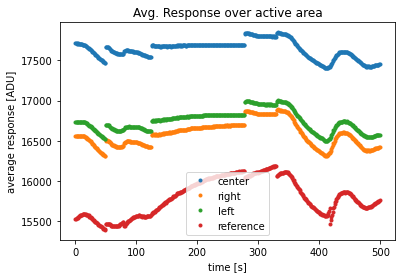

In [234]:
plt.plot( center,'.',label = 'center') 
plt.plot( right,'.',label = 'right')
plt.plot(left,'.',label = 'left') 
plt.plot( ref,'.',label = 'reference') 
plt.ylabel('average response [ADU]')
plt.xlabel('time [s]') 
plt.title("Avg. Response over active area") 
plt.legend() 
plt.show()


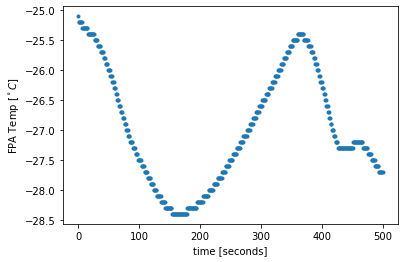

In [236]:
plt.plot(temps,'.',label = "trial 1")
plt.ylabel('FPA Temp [$^\circ C$]')
plt.xlabel('time [seconds]')
plt.show()